### Задание 2



##### Т.к. мы рассматриваем $Geom(\theta)$, то по природе $\theta \in [0, 1]$. Рассмотрим плотность априорного распределения $B(a, b)$:

$$
p(\theta,a,b)=\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}\chi_{[0,1]}(\theta)
$$

##### Функция правдобоподбия:

$$
L(\theta | x) = \prod_{i=1}^n \theta (1 - \theta)^{x_i} = \theta^n (1 - \theta)^{\sum_{i=1}^n x_i}
$$

##### Нормирующий множитель:
$$
\int_0^1 L(X|\theta) p(\theta)  d\theta = \int_0^1 \theta^n \cdot (1 - \theta)^{\sum_{i=1}^{n} x_i} \cdot \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} \cdot \theta^{a - 1} \cdot (1 - \theta)^{b - 1}  d\theta =
$$

$$
= \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} \cdot \frac{\Gamma(n + a) \cdot \Gamma\left(\sum_{i=1}^{n} x_i + b\right)}{\Gamma\left(n + a + \sum_{i=1}^{n} x_i + b\right)}
$$

#### Итоговое апостериорное распределение:

$$
p(\theta|X) = \frac{\Gamma\left(n + a + b + \sum_{i=1}^{n} x_i\right)}{\Gamma(n + a) \cdot \Gamma\left(\sum_{i=1}^{n} x_i + b\right)} \cdot \theta^{n + a - 1} \cdot (1 - \theta)^{\sum_{i=1}^n x_i + b - 1}
$$

#### Или же:

$$
\theta|X \sim \Beta(n+a,{\sum_{i=1}^n x_i} + b)
$$

#### Итоговая Байесовская оценка параметра:

$$
\hat{\theta}_B = E[\theta|X] = \frac{n + a}{n + a + \sum_{i=1}^n x_i + b}
$$

Теоретическая оценка: 0.874183536553773
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 2 1 0]
[0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[2 1 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 2 0 0]
[0 2 0 0 0 0 0 0 2 1]
[0 0 0 0 0 1 2 0 0 1]
[0 0 0 0 0 0 2 0 1 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 1 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 2 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 1 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1

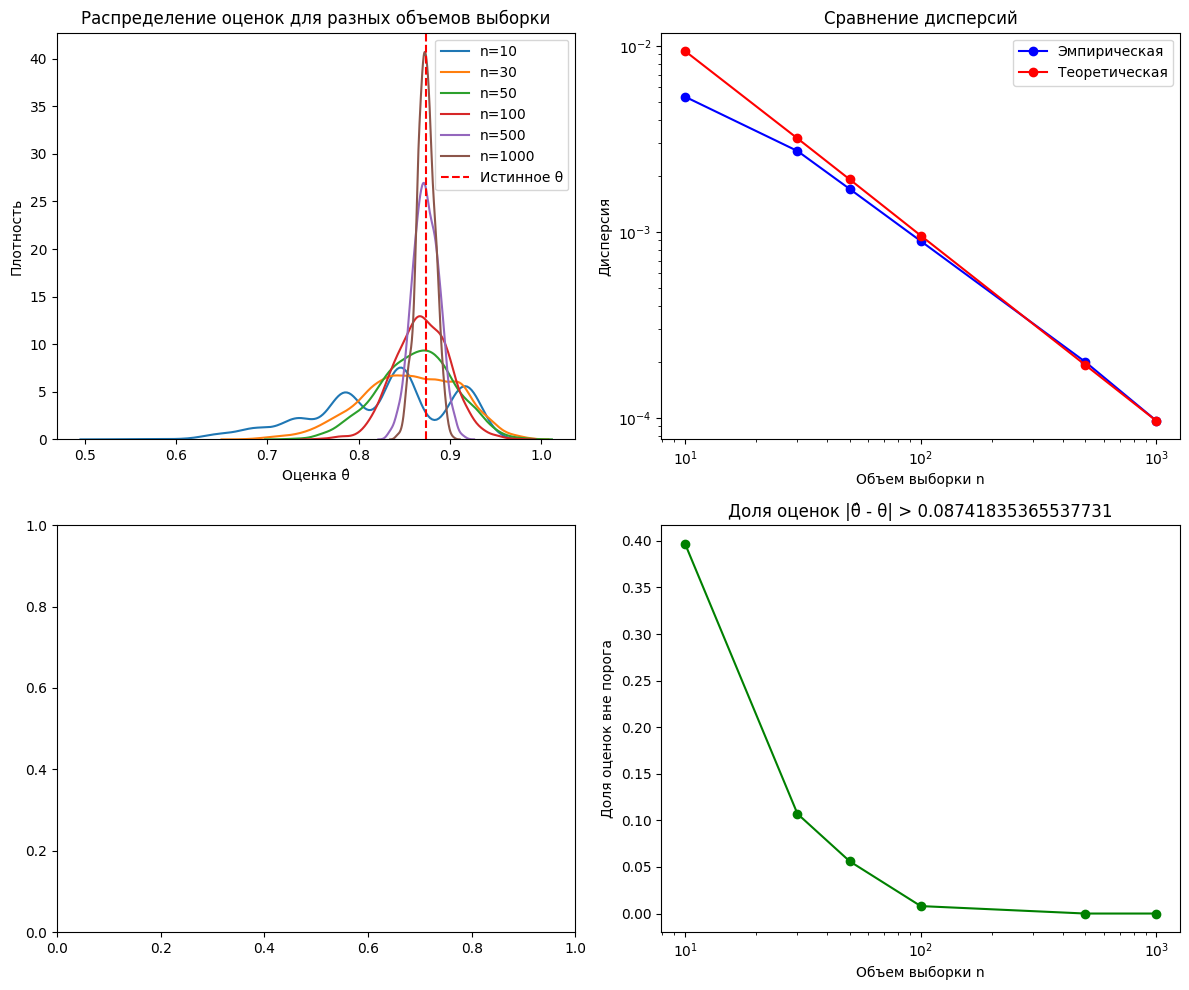

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
import seaborn as sns


a = b = 1
theoretic_theta = np.random.rand()
print(f"Теоретическая оценка: {theoretic_theta}")

sample_sizes = [10, 30, 50, 100, 500, 1000]
m = 1000

threshold = 0.1 * theoretic_theta

results = {}
theoretic_variances = []

for n in sample_sizes:

    errors = []
    estimates = []
    theor_var = []

    for _ in range(m):

        sample = geom.rvs(theoretic_theta, loc=-1, size=n)
        print(sample)
        theta_hat = (n + a) / (n + a + sample.sum() + b)
        estimates.append(theta_hat)
        theor_var.append((n + a) * (sample.sum() + b) / ((n + a + sample.sum() + b) ** 2 * (n + a + sample.sum() + b + 1)))
        errors.append(theta_hat - theoretic_theta)
    
    theoretic_variances.append(np.mean(theor_var))
    
    results[n] = {
        'estimates': np.array(estimates),
        'bias': np.mean(errors),
        'variance': np.var(estimates, ddof=1),
        'outside_threshold': np.sum(np.abs(errors) > threshold)
    }


print("Результаты эксперимента:")
print(
    'n',
    'Bias\t',
    'Var(θ)\t',
    'E[θ]\t',
    'Outside Thr\t',
    sep='\t'
)
for n in sample_sizes:
    r = results[n]
    print(
        n,
        f"{r['bias']:.6f}",
        f"{r['variance']:.6f}",
        f"{np.mean(r['estimates']):.6f}",
        f"{r['outside_threshold']}/{m}",
        sep='\t'
    )

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


for n in sample_sizes:
    sns.kdeplot(results[n]['estimates'], label=f'n={n}', ax=axes[0,0])
axes[0,0].axvline(theoretic_theta, color='red', linestyle='--', label='Истинное θ')
axes[0,0].set_xlabel('Оценка θ̂')
axes[0,0].set_ylabel('Плотность')
axes[0,0].set_title('Распределение оценок для разных объемов выборки')
axes[0,0].legend()

empirical_vars = [results[n]['variance'] for n in sample_sizes]
axes[0,1].plot(sample_sizes, empirical_vars, 'bo-', label='Эмпирическая')
axes[0,1].plot(sample_sizes, theoretic_variances, 'ro-', label='Теоретическая')
axes[0,1].set_xlabel('Объем выборки n')
axes[0,1].set_ylabel('Дисперсия')
axes[0,1].set_title('Сравнение дисперсий')
axes[0,1].legend()
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

outside_ratio = [results[n]['outside_threshold']/m for n in sample_sizes]
axes[1,1].plot(sample_sizes, outside_ratio, 'go-')
axes[1,1].set_xlabel('Объем выборки n')
axes[1,1].set_ylabel('Доля оценок вне порога')
axes[1,1].set_title(f'Доля оценок |θ̂ - θ| > {threshold}')
axes[1,1].set_xscale('log')

plt.tight_layout()
plt.show()